In [57]:
# Jacob Craven, Kevin Endrijaitis, Braden Burgener, Adam Rich​
# CS 490 AA
# Final Project Code

import numpy as np
import matplotlib.pyplot as plt
import time
import math

In [58]:
def load_data(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        weights = []
        for line in lines:
            weights.append(line.strip())
        file.close()
    for i in range(len(weights)):
        weights[i] = math.floor(float(weights[i]))
        if weights[i] <= 0:
            weights[i] = 1
    return weights

def knapsack(packages, capacity, package_limit):
    num_rows = len(packages) + 1
    num_cols = capacity + 1
    matrix = np.zeros((num_rows, num_cols), dtype=int)
    

    for i in range(1, num_rows):
        for j in range(1, num_cols):
            # print(type(packages[i-1]), j)
            if int(packages[i-1]) <= j:
                matrix[i][j] = max(matrix[i-1][j], matrix[i-1][j-int(packages[i-1])] + packages[i-1])
            else:
                matrix[i][j] = matrix[i-1][j]
    current_weight = matrix[-1][-1]
    current_deliveries = []
    for i in range(num_rows - 1, 0, -1):
        if current_weight <= 0:
            break
        if current_weight == matrix[i-1][j]:
            continue
        else:
            current_deliveries.append(packages[i-1])
            current_weight -= packages[i-1]
    current_deliveries.reverse()
    if len(current_deliveries) > package_limit:
        current_deliveries = current_deliveries[:package_limit]
    for package in current_deliveries:
        packages.remove(package)
    return current_deliveries


def greedy(packages, capacity, max_packages):
    current_weight = 0
    current_deliveries = []
    to_remove = []

    for i, package in enumerate(packages):
        if current_weight + package <= capacity:
            current_weight += package
            current_deliveries.append(package)
            to_remove.append(i)
        if len(current_deliveries) >= max_packages:
            break

    for i in reversed(to_remove):
        del packages[i]

    return current_deliveries


In [59]:
weights = load_data("amazon_weights.txt")
weights = [round(max(0.1, float(w) / 16.0), 2) for w in weights]  # Convert oz → lb safely
print(len(weights))
knapsack(weights, 20, 2)

8552


[10.69, 4.0]

In [60]:
def run_experiment_3_limited(weights, distance_ft=6000):
    bag_sizes = [2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
    greedy_times = []
    knapsack_times = []

    for bag_size in bag_sizes:
        print(f"\nRunning for bag size: {bag_size} ft³")
        max_packages = int(bag_size / 0.34375)
        print(f"→ Max packages allowed per trip: {max_packages}")

        # --- Greedy ---
        start_greedy = time.time()
        greedy_weights = weights[:8552].copy()
        total_time_greedy = 0
        trip_count = 0

        while greedy_weights:
            trip_count += 1
            #print(f"  [Greedy] Trip #{trip_count} — Remaining packages: {len(greedy_weights)}")
            delivery = greedy(greedy_weights, 20, max_packages)

            if not delivery:
                #print("  [Greedy] No packages fit this trip — exiting loop")
                break

            trip_weight = sum(delivery)
            v = 65 - (20 * (trip_weight / 20))

            # Protect against divide-by-zero
            if v <= 0:
                #print(f"Skipping trip: velocity = {v:.2f} ft/s (trip weight = {trip_weight:.2f} lb)")
                continue

            t = distance_ft / v
            total_time_greedy += t


        greedy_times.append(total_time_greedy)
        print(f"Greedy total delivery time: {round(total_time_greedy, 2)} seconds (elapsed: {round(time.time() - start_greedy, 2)}s)")

        # --- Knapsack ---
        start_knapsack = time.time()
        knapsack_weights = weights[:8552].copy()
        total_time_knapsack = 0
        trip_count = 0

        while knapsack_weights:
            trip_count += 1
            #print(f"  [Knapsack] Trip #{trip_count} — Remaining packages: {len(knapsack_weights)}")
            delivery = knapsack(knapsack_weights, 20, max_packages)

            if not delivery:
                #print("  [Knapsack] No packages fit this trip — exiting loop")
                break

            trip_weight = sum(delivery)
            v = 65 - (20 * (trip_weight / 20))

            # Protect against divide-by-zero
            if v <= 0:
                # print(f"Skipping trip: velocity = {v:.2f} ft/s (trip weight = {trip_weight:.2f} lb)")
                continue

            t = distance_ft / v
            total_time_knapsack += t


        knapsack_times.append(total_time_knapsack)
        print(f"Knapsack total delivery time: {round(total_time_knapsack, 2)} seconds (elapsed: {round(time.time() - start_knapsack, 2)}s)")

    print("\n Final Delivery Time Summary")
    print("--------------------------------------------------------")
    print(f"{'Bag Size (ft³)':<15}{'Greedy Time (s)':<20}{'Knapsack Time (s)':<20}")
    print("--------------------------------------------------------")
    for i in range(len(bag_sizes)):
        print(f"{bag_sizes[i]:<15}{round(greedy_times[i], 2):<20}{round(knapsack_times[i], 2):<20}")
    print("--------------------------------------------------------\n")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(bag_sizes, greedy_times, marker='o', label='Greedy')
    plt.plot(bag_sizes, knapsack_times, marker='s', label='Knapsack')
    plt.title("Experiment 3: Bag Size vs Delivery Time (8000 packages)")
    plt.xlabel("Bag Size (cubic feet)")
    plt.ylabel("Total Delivery Time (seconds)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return list(zip(bag_sizes, greedy_times, knapsack_times))



Running for bag size: 2.5 ft³
→ Max packages allowed per trip: 7
Greedy total delivery time: 137754.59 seconds (elapsed: 0.02s)
Knapsack total delivery time: 140960.2 seconds (elapsed: 175.61s)

Running for bag size: 3.5 ft³
→ Max packages allowed per trip: 10
Greedy total delivery time: 107852.55 seconds (elapsed: 0.04s)
Knapsack total delivery time: 111441.42 seconds (elapsed: 126.23s)

Running for bag size: 4.5 ft³
→ Max packages allowed per trip: 13
Greedy total delivery time: 94977.0 seconds (elapsed: 0.08s)
Knapsack total delivery time: 97303.5 seconds (elapsed: 104.9s)

Running for bag size: 5.5 ft³
→ Max packages allowed per trip: 16
Greedy total delivery time: 89540.15 seconds (elapsed: 0.1s)
Knapsack total delivery time: 90222.18 seconds (elapsed: 92.22s)

Running for bag size: 6.5 ft³
→ Max packages allowed per trip: 18
Greedy total delivery time: 88070.95 seconds (elapsed: 0.13s)
Knapsack total delivery time: 87514.38 seconds (elapsed: 86.75s)

Running for bag size: 7.5 ft

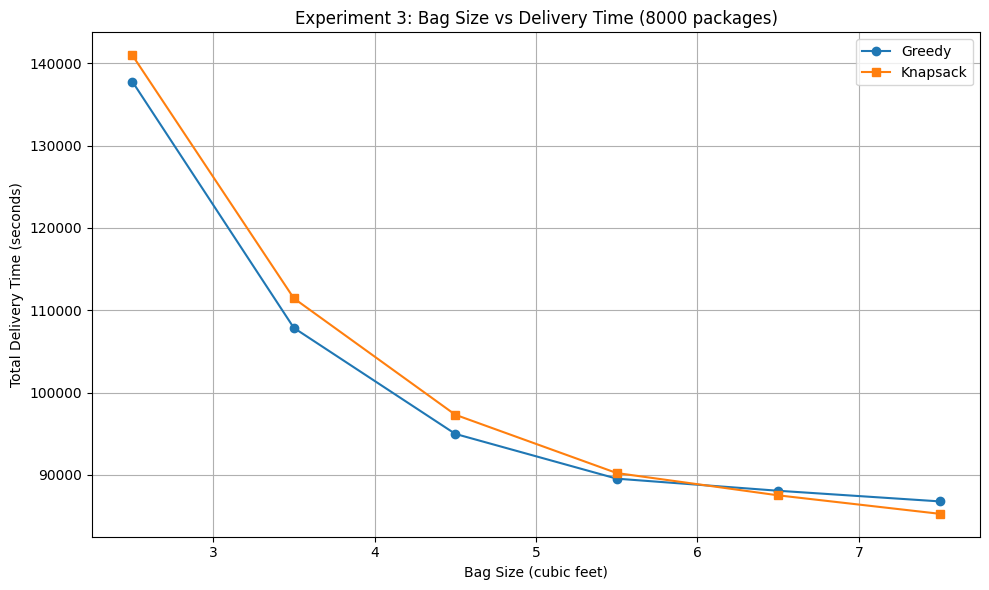

In [61]:
weights = load_data("amazon_weights.txt")
weights = [round(max(0.1, float(w) / 16.0), 2) for w in weights]  # Convert oz → lb safely
experiment3_results = run_experiment_3_limited(weights)